In [1]:
import numpy as np
from numpy.random import seed

class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=10,
                 shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        self.w_initialized = False
    
    def fit(self, X, y):
        self._initialize_w(X.shape[1])
        self.avg_costs_ = []
        
        for _ in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            costs = []
            for xi, target in zip(X, y):
                costs.append(self._update_w(xi, target))
            avg_cost = sum(costs) / len(y)
            self.avg_costs_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_w(X.shape[1])
            
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_w(xi, target)
        else:
            self._update_w(X, y)
        return self
    
    def _initialize_w(self, n):
        self.w_ = np.zeros(n + 1)
        self.w_initialized = True
        
    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _update_w(self, xi, target):
        error = target - self.net_input(xi)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0]  += self.eta * error
        cost = error**2 / 2.0
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [2]:
a2 = AdalineSGD(eta=0.01, n_iter=10, shuffle=True, random_state=1)

X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([-1, -1, 1])

a2.fit(X, y)

print('Whts: \n' + str(a2.w_))
print('Avg costs: \n' + str(a2.avg_costs_))

a2.partial_fit(X, y)

print('Whts_partial: \n' + str(a2.w_))
# print('Avg costs: \n' + str(a2.avg_costs_))
# partial_fit() ds nt update costs

Whts: 
[-0.11651431  0.0675915  -0.04892281]
Avg costs: 
[0.7033839999999999, 0.65485557394304006, 0.67293258177538606, 0.66779998741266722, 0.68380114196534858, 0.58202439123779304, 0.65846359130944121, 0.6465362033714328, 0.60158798645548739, 0.6134907046006689]
Whts_partial: 
[-0.11751896  0.11246114 -0.00505782]


In [3]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


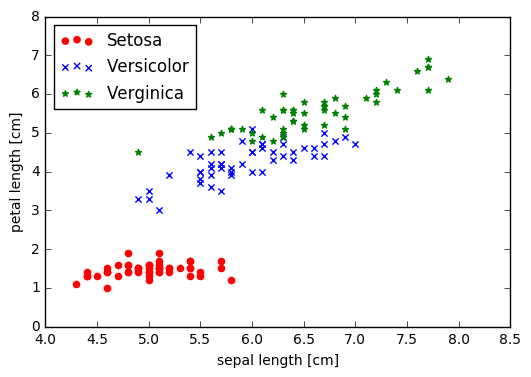

In [4]:
import matplotlib.pyplot as plt

y = df.iloc[0:150, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)
X = df.iloc[0:150, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='Versicolor')
plt.scatter(X[100:150, 0], X[100:150, 1], color='green', marker='*', label='Verginica')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Classifyi j 2 species: Setosa vs Versicolor
X = X[0:100]
y = y[0:100]

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('x', 'o', 's', '^', 'v')
    colors = ('blue', 'red', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

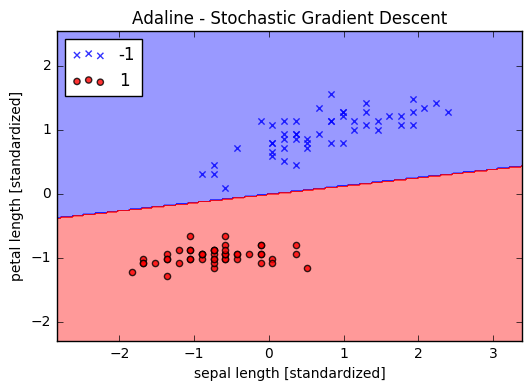

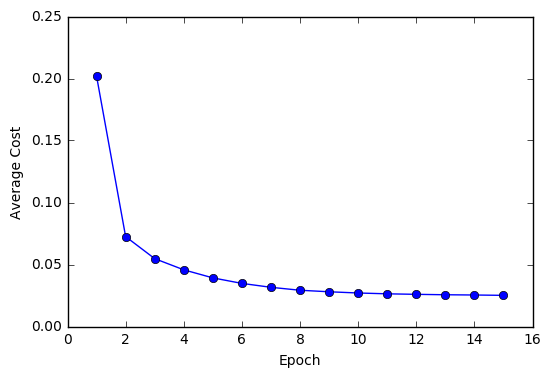

In [6]:
# Standardizatn
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

aln = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
aln.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=aln)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(aln.avg_costs_) + 1), aln.avg_costs_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Average Cost')
plt.show()

In [7]:
# Update model by on-line learning
print('Old: ' + str(aln.w_))

X_new = X_std[0, :]
y_new = y[0]

aln.partial_fit(X_new, y_new)

print('New: ' + str(aln.w_))

Old: [-0.01081067  0.13961527 -1.07501121]
New: [-0.01079579  0.13960662 -1.0750263 ]
